# **Kendall Lab Survival Curve**

## *Brian J. Ault*

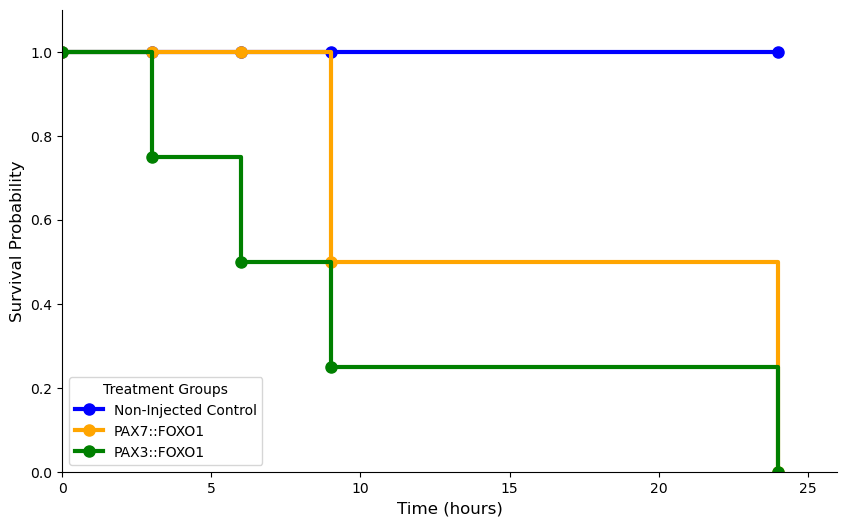

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Data Preparation
survival_data = {
    'time': [3, 6, 9, 24, 3, 6, 9, 24, 3, 6, 9, 24],
    'events': [0, 0, 0, 0, 0, 0, 1, 9, 3, 3, 1, 2],  # Number of deaths observed
    'group': ['Non-Injected Control'] * 4 + ['PAX7::FOXO1'] * 4 + ['PAX3::FOXO1'] * 4
}

# Prepare DataFrame
df = pd.DataFrame(survival_data)

# Create a Kaplan-Meier plot
plt.figure(figsize=(10, 6))

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Define colors for each group
colors = {
    'Non-Injected Control': 'blue',
    'PAX7::FOXO1': 'orange',
    'PAX3::FOXO1': 'green'
}

# Fit and plot for each group
for group in df['group'].unique():
    group_data = df[df['group'] == group]
    kmf.fit(durations=group_data['time'], event_observed=group_data['events'], label=group)
    kmf.plot_survival_function(linewidth=3, ci_show=False, marker='o', markersize=8, color=colors[group])

# Customizing the plot
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.xlim(0, 26)  # Extend x-axis to 26 hours for visibility
plt.ylim(0, 1.1)  # Extend y-axis slightly beyond 1 for clarity

# Remove grid lines
plt.grid(False)

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend(title='Treatment Groups')
plt.show()

# **Survival Curve**